In [2]:
#Data Collection

import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from config import API_KEY
year = input ('Year:')
month = input ('Month as number:')
#capitalizes first letter because only sections written with first letter capitalized will run
sections = input('Section (capitalize first letter): ') 

#API call to the Archive API
response = r.get(f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={API_KEY}").content.decode()


#Convert JSON response results to dataframe "results"
nyt_archive = pd.read_json(StringIO(response))
results = pd.json_normalize(nyt_archive['response']['docs'])
results 
#Filtering dataframe based on section requested by user 
filtered_results = results[results['section_name'] == sections]
#prints headlines, publication dates, and keywords
data = filtered_results[['headline.main', 'pub_date', 'keywords']] 
display(data)


Year:2020
Month as number:3
Section (capitalize first letter): Technology


,headline.main,pub_date,keywords
76,Intel’s Culture Needed Fixing. Its C.E.O. Is S...,2020-03-01T21:47:02+0000,"[{'name': 'subject', 'value': 'Computer Chips'..."
120,Can YouTube Quiet Its Conspiracy Theorists?,2020-03-02T10:00:01+0000,"[{'name': 'subject', 'value': 'Fringe Groups a..."
141,Silicon Valley Leaders’ Plea to Democrats: Any...,2020-03-02T10:00:20+0000,"[{'name': 'subject', 'value': 'Computers and t..."
231,Apple Agrees to Pay Some iPhone Owners $25 Each,2020-03-02T23:17:29+0000,"[{'name': 'subject', 'value': 'iPhone', 'rank'..."
255,Waymo Includes Outsiders in $2.25 Billion Inve...,2020-03-03T02:01:49+0000,"[{'name': 'subject', 'value': 'Driverless and ..."
385,High-Flying Trading App Robinhood Goes Down at...,2020-03-03T19:22:35+0000,"[{'name': 'organizations', 'value': 'Robinhood..."
480,Get the Most Out of Your Fancy Smartphone Camera,2020-03-04T10:00:28+0000,"[{'name': 'subject', 'value': 'Smartphones', '..."
519,Can You Really Hire a Hit Man on the Dark Web?,2020-03-04T16:30:09+0000,"[{'name': 'subject', 'value': 'Black Markets',..."
560,DoorDash Faces Its Latest Challenge: Wooing Wa...,2020-03-04T19:21:55+0000,"[{'name': 'organizations', 'value': 'DoorDash ..."
615,Tulsi Gabbard’s $50 Million Suit Against Googl...,2020-03-05T00:36:04+0000,"[{'name': 'subject', 'value': 'Political Adver..."


In [2]:
#2a) Count the occurrence of unique keywords
keywords = data['keywords'].explode()
# Normalize the keywords to extract the 'value' part which contains keywords
extracted = pd.json_normalize(keywords)['value']
keywords_count = extracted.value_counts()
print(keywords_count)
  
print ()

#2b) Analyzes top keywords and frequency by date
dates = pd.to_datetime(data['pub_date']).dt.date #Convert 'pub_date' column to a series of dates

# Create an empty list to append values later on
top_keywords_data = []

# Iterate over each day of the month
for date in dates.unique():
    # Filter for all keywords and frequencies
    data_date = data[dates == date]
    top_keywords = pd.json_normalize(data_date['keywords'].explode())['value'].value_counts()
    # Extract the top keyword and frequency
    top_keyword_date = top_keywords.index[0]
    frequency = top_keywords.iloc[0]
    # Append date, keyword and frequency to the list  
    top_keywords_data.append({'Date': date, 'Top Keyword': top_keyword_date, 'Frequency': frequency})

# Converting list to dataframe
top_keywords_per_day = pd.DataFrame(top_keywords_data)

print(top_keywords_per_day)

Computers and the Internet    36
Coronavirus (2019-nCoV)       29
Social Media                  15
Mobile Applications           12
Google Inc                    10
                              ..
Infant Formulas                1
Babies and Infants             1
Diet and Nutrition             1
Betesh Group                   1
TikTok (ByteDance)             1
Name: value, Length: 276, dtype: int64

          Date                             Top Keyword  Frequency
0   2020-03-01                          Computer Chips          1
1   2020-03-02              Computers and the Internet          2
2   2020-03-03  Driverless and Semiautonomous Vehicles          1
3   2020-03-04              Computers and the Internet          2
4   2020-03-05                   Political Advertising          2
5   2020-03-06              Computers and the Internet          1
6   2020-03-08               Rumors and Misinformation          1
7   2020-03-09                            Social Media          2
8  

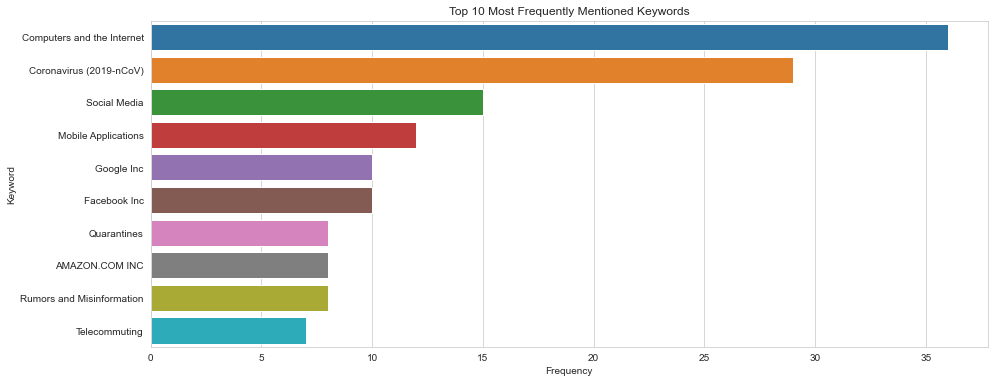

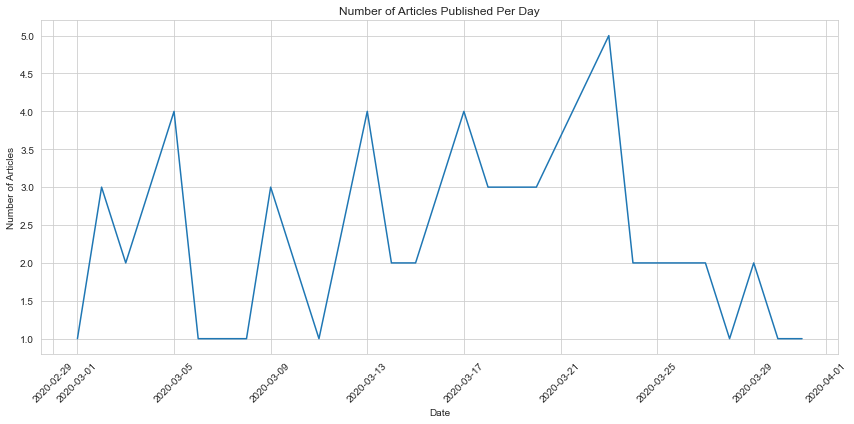

In [3]:
#3a) Bar chart of the top 10 most frequently mentioned keywords

keywords_count = extracted.value_counts().reset_index()

#Top 10 most frequently mentioned keywords
top_keywords = keywords_count.head(10)

# Plotting bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(x='value', y='index', data=top_keywords)
plt.title('Top 10 Most Frequently Mentioned Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()



#3b) Line graph illustrating the number of articles published per day

#Convert 'pub_date' column to a series of dates
dates = pd.to_datetime(data['pub_date']).dt.date

#Counts the frequency of articles published each date 
articles_by_date = dates.value_counts()

#Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=articles_by_date)
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()